C:\Users\weiyu\AppData\Local\Temp/ipykernel_1604/3727448097.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


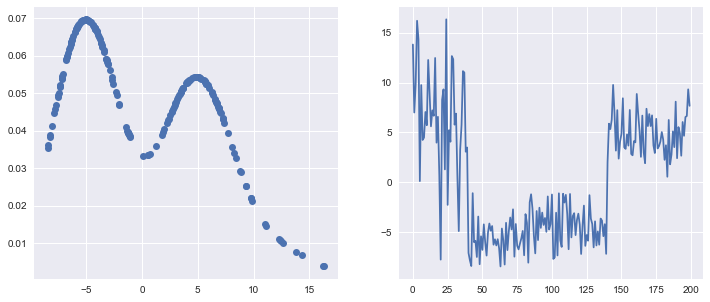

In [1]:
from scipy.stats import gaussian_kde
from scipy.optimize import brute, curve_fit, fmin, least_squares

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def gaussian(xdata, mu, sig, k=1):

    return abs(k) / (np.sqrt(2*np.pi*sig**2)) * np.exp(-(xdata-mu)**2/(2*sig**2))

np.random.seed(0)
xs = np.concatenate([5*np.random.randn(40)+5, 2*np.random.randn(100)-5,   2*np.random.randn(60) + 5])

kfunc = gaussian_kde(xs)
ys = kfunc(xs)

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 5))

ax.plot(xs, ys, 'o')



ax1.plot(xs);


In [2]:

def gaussian(xdata, mu, sig, k):

    return abs(k) / (np.sqrt(2*np.pi*sig**2)) * np.exp(-(xdata-mu)**2/(2*sig**2))

def brute_cache(func): 
    
    cache = {}
    
    def wrapper(idx, *args):
        
        idx = np.unique(np.asarray(idx, dtype=int))
        key = tuple(idx)
        
        if key not in cache:
            
            cache[key] = func(idx, *args)
            
        return cache[key]
    return wrapper

@brute_cache
def optfun_brute(idx, *args):


    def optfun_lsq(ks, *args):
        
        xs, ys, gparams = args        
        return ((ys - sum(map(lambda n: gaussian(xs, 
                        *gparams[n], ks[n]), range(len(ks)))))**2).sum()
            
            
    
    xs, ys, chunk_size = args
    
    
    indices = np.vstack(zip(np.concatenate([[0], idx]), 
                            np.concatenate([idx, [len(xs)]])))
        
    gparams = np.vstack([(lambda arr: (arr.mean(), arr.std()))(xs[a:b]) 
                         for a, b in indices if b - a >= max(chunk_size, 2)])
    
    
    p0 = 0.5 * np.ones(len(gparams))

    res = least_squares(optfun_lsq, p0, bounds=(0, 1), args=(xs, ys, gparams))

    return res['cost']

def cluster_kde2gauss(xs, peaks, Ns=10, chunk_min=0):
    
    
    kfunc = gaussian_kde(xs)
    ys = kfunc(xs)
    
    rngs = [(0, len(xs))] * (peaks - 1)

    res = brute(optfun_brute, rngs, args=(xs, ys, chunk_min), 
                Ns=Ns, full_output=False, finish=fmin)
    
    return res[:2]

np.random.seed(20)
xs = np.concatenate([5*np.random.randn(40)+5, 2*np.random.randn(100)-5,   2*np.random.randn(60) + 5])

cluster_kde2gauss(xs, 3, chunk_min=20, Ns=10)


C:\Users\WEI\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([ 46.484375  , 143.56770833])

In [24]:
[[1,2,3]]*0


[]